Team Menber: Yashwi Shah

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


# Mount Google Drive if not already mounted
from google.colab import drive
drive.mount('/content/drive')

directory_path = '/content/drive/MyDrive/CS418_Project/RawData/CleanedData'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


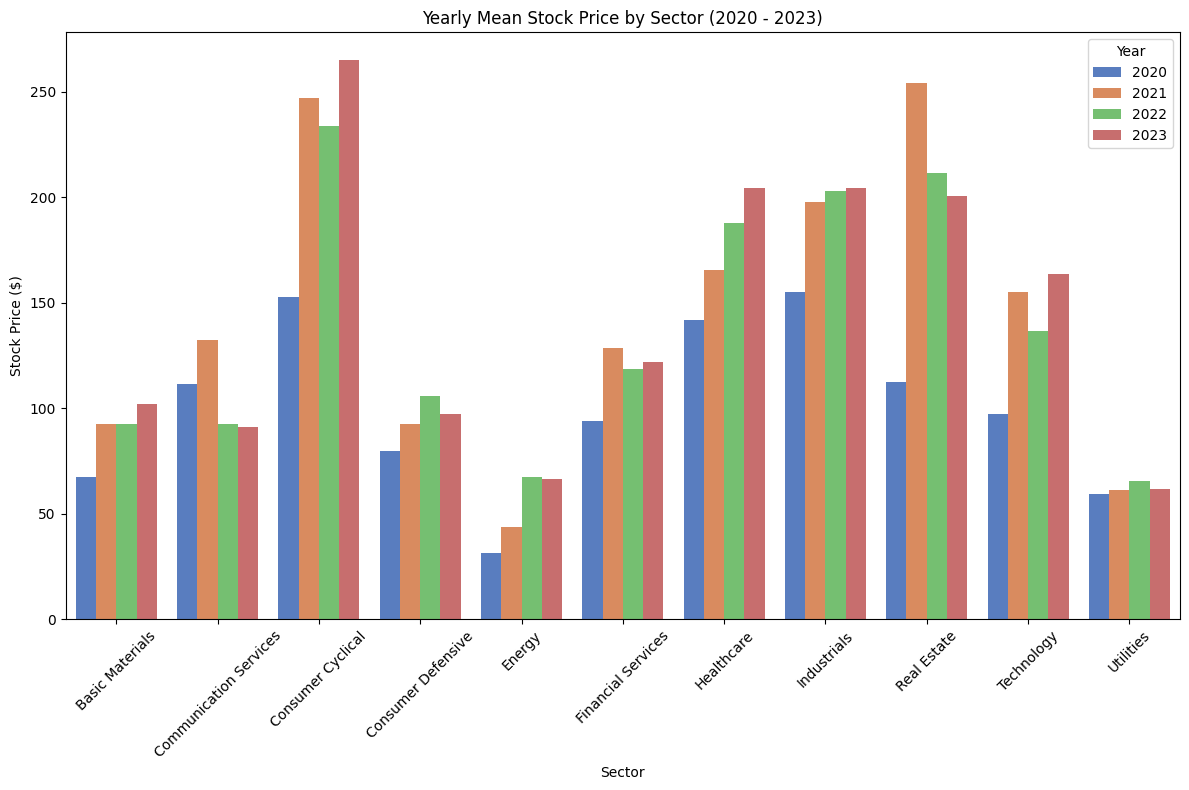

In [ ]:

# Read CSV files into DataFrames
data_2020 = pd.DataFrame(pd.read_csv(directory_path+'/cleaned_data_2020.csv'))
data_2021 = pd.DataFrame(pd.read_csv(directory_path+'/cleaned_data_2021.csv'))
data_2022 = pd.DataFrame(pd.read_csv(directory_path+'/cleaned_data_2022.csv'))
data_2023 = pd.DataFrame(pd.read_csv(directory_path+'/cleaned_data_2023.csv'))

# Add a 'Year' column to each DataFrame
data_2020['Year'] = 2020
data_2021['Year'] = 2021
data_2022['Year'] = 2022
data_2023['Year'] = 2023

# Combines all columns
df_combined = pd.concat([data_2020, data_2021, data_2022, data_2023], ignore_index=True)

# Group by sector and year
grouped_by_sector_year = df_combined.groupby(['Sector', 'Year'])

# Get the columns for stock price on monthly bases
monthly_columns = ['m1-o', 'm2-o', 'm3-o', 'm4-o', 'm5-o', 'm6-o', 'm7-o', 'm8-o', 'm9-o', 'm10-o', 'm11-o', 'm12-o']

sector_means = {}

# Iterate through each sector and year combination
for (sector, year), sector_year_data in grouped_by_sector_year:
    sector_means[(sector, year)] = round(sector_year_data[monthly_columns].values.mean(), 2)

# Create DataFrame from sector_means dictionary
mean_df = pd.DataFrame(sector_means.items(), columns=['Sector_Year', 'Mean_Stock_Price'])
mean_df[['Sector', 'Year']] = pd.DataFrame(mean_df['Sector_Year'].tolist(), index=mean_df.index)

# Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Sector', y='Mean_Stock_Price', hue='Year', data=mean_df, palette="muted")
plt.title('Yearly Mean Stock Price by Sector (2020 - 2023)')
plt.xlabel('Sector')
plt.ylabel('Stock Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

The chart shows the average stock prices for different sectors from 2020 to 2023, providing valuable information about how each sector performed over the four-year span. Each bar on the chart represents a specific sector, with the height of the bar indicating the average stock price for that sector in a particular year. The use of different colors for each year makes it easier to compare the performance of sectors over time, making it simple to identify any changes in how sectors are doing. By examining the variations in bar heights for each sector across the years, one can spot trends in how stock prices in specific sectors have fluctuated, pinpointing which sectors are consistently strong or unpredictable. When you compare the heights of bars in different sectors for a particular year, it helps to identify which sectors are performing relatively well or poorly compared to others. This visual representation is beneficial for investors, analysts, and decision-makers to comprehend how sectors are performing, evaluate potential investment opportunities, and make well-informed choices in the financial markets by considering factors such as sector resilience, adaptability, and vulnerability to external influences.

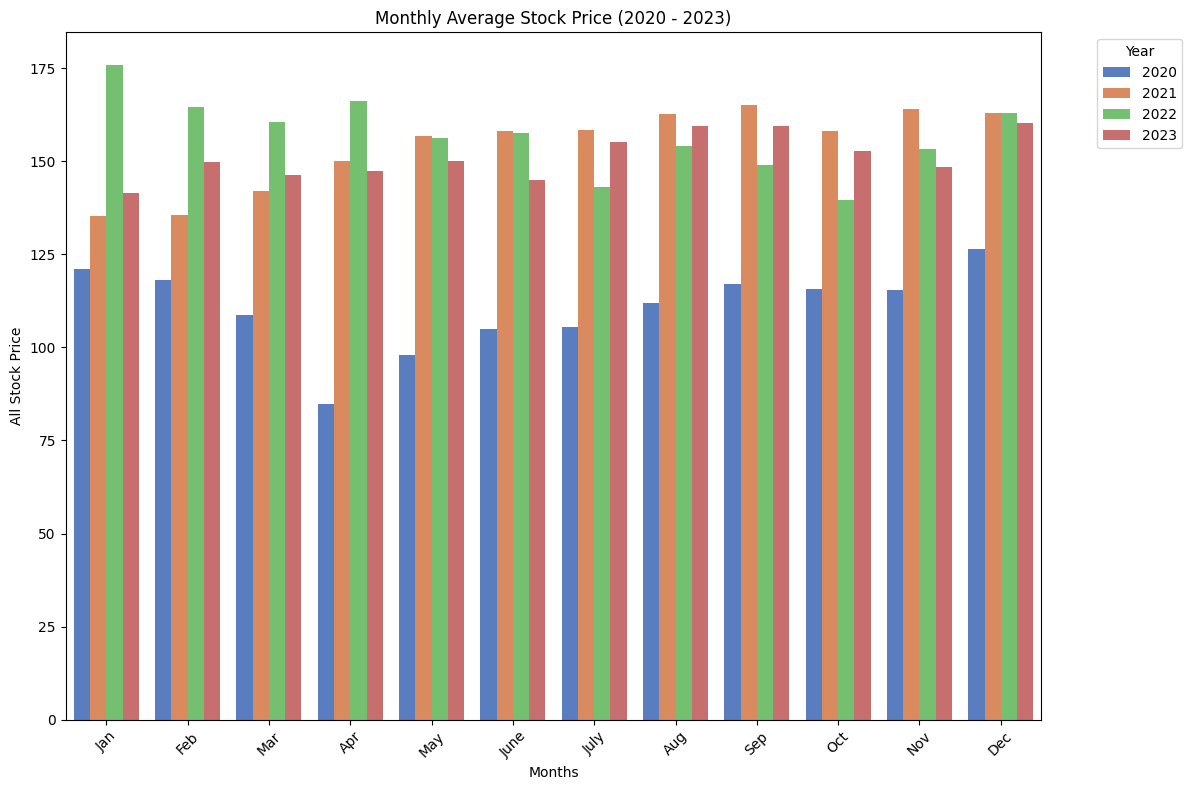

In [ ]:

# Read CSV files into DataFrames
data_2020 = pd.DataFrame(pd.read_csv(directory_path+'/cleaned_data_2020.csv'))
data_2021 = pd.DataFrame(pd.read_csv(directory_path+'/cleaned_data_2021.csv'))
data_2022 = pd.DataFrame(pd.read_csv(directory_path+'/cleaned_data_2022.csv'))
data_2023 = pd.DataFrame(pd.read_csv(directory_path+'/cleaned_data_2023.csv'))

# Convert the Stocks columns to float
data_2020.loc[:, 'm1-o':'m12-c'] = data_2020.loc[:, 'm1-o':'m12-c'].astype(float)
data_2021.loc[:, 'm1-o':'m12-c'] = data_2021.loc[:, 'm1-o':'m12-c'].astype(float)
data_2022.loc[:, 'm1-o':'m12-c'] = data_2022.loc[:, 'm1-o':'m12-c'].astype(float)
data_2023.loc[:, 'm1-o':'m12-c'] = data_2023.loc[:, 'm1-o':'m12-c'].astype(float)

# Add a 'Year' column to each DataFrame
data_2020['Year'] = 2020
data_2021['Year'] = 2021
data_2022['Year'] = 2022
data_2023['Year'] = 2023

# Remove the null values
data_2020_cleaned = data_2020.dropna()
data_2021_cleaned = data_2021.dropna()
data_2022_cleaned = data_2022.dropna()
data_2023_cleaned = data_2023.dropna()

# print(data_2021_cleaned)

# Combines all columns
df_combined = pd.concat([data_2020_cleaned, data_2021_cleaned, data_2022_cleaned, data_2023_cleaned],  ignore_index=True)

stock_columns = ['m1-o', 'm2-o', 'm3-o', 'm4-o', 'm5-o', 'm6-o', 'm7-o', 'm8-o', 'm9-o', 'm10-o', 'm11-o', 'm12-o']


# Calculate mean stock price for each month by year
mean_stock_price_by_year = {}
for year in range(2020, 2024):
    mean_stock_price_by_year[year] = df_combined[df_combined['Year'] == year][stock_columns].mean().round(2)

# Create a DataFrame with month names as columns
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
mean_stock_price_df = pd.DataFrame(mean_stock_price_by_year).T  # Transpose DataFrame
mean_stock_price_df.columns = month_names  # Assign month names as column names

# Melt the DataFrame to reshape it for seaborn
melted_mean_stock_price_df = mean_stock_price_df.reset_index().melt(id_vars='index', var_name='Month', value_name='Mean Stock Price')

# Plotting using Seaborn's barplot
plt.figure(figsize=(12, 8))
sns.barplot(data=melted_mean_stock_price_df, x='Month', y='Mean Stock Price', hue='index', palette='muted')
plt.title('Monthly Average Stock Price (2020 - 2023)')
plt.xlabel('Months')
plt.ylabel('All Stock Price')
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Using data on stock prices from 2020 to 2023, our analysis reveals distinct patterns in monthly performance. Specifically, January and December stood out as very strong months with respect to stock price performance. Nevertheless, this encouraging trend was short-lived, as stock values fell in the months that followed after January. It's interesting to note that stock prices seemed to bounce back near the end of the year, suggesting that late-year optimism is a recurring theme. The general outlook for 2020 remained low despite these rare upswings, indicating difficult market circumstances and unpredictable economic times. This in-depth analysis of stock price dynamics offers insightful information about the fluctuation and cyclicality of market patterns over the studied period.

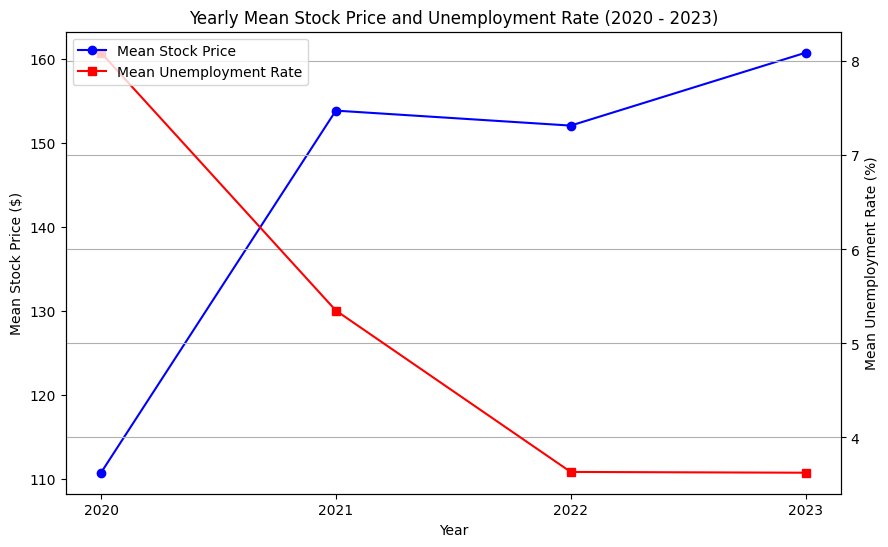

In [ ]:

# Read CSV files into DataFrames
data_2020 = pd.DataFrame(pd.read_csv(directory_path+'/cleaned_data_2020.csv'))
data_2021 = pd.DataFrame(pd.read_csv(directory_path+'/cleaned_data_2021.csv'))
data_2022 = pd.DataFrame(pd.read_csv(directory_path+'/cleaned_data_2022.csv'))
data_2023 = pd.DataFrame(pd.read_csv(directory_path+'/cleaned_data_2023.csv'))

data_2020['Year'] = 2020
data_2021['Year'] = 2021
data_2022['Year'] = 2022
data_2023['Year'] = 2023

# Concatenate all dataframes
df_combined = pd.concat([data_2020, data_2021, data_2022, data_2023])

# Get the columns for stock on monthly basis
stock_columns = ['m1-o', 'm2-o', 'm3-o', 'm4-o', 'm5-o', 'm6-o', 'm7-o', 'm8-o', 'm9-o', 'm10-o', 'm11-o', 'm12-o']
unemployment_columns = ['ur-1', 'ur-2', 'ur-3', 'ur-4', 'ur-5', 'ur-6', 'ur-7', 'ur-8', 'ur-9', 'ur-10', 'ur-11', 'ur-12']

# Calculate mean stock prices and unemployment rates by year
df_combined['Yearly Stock'] = df_combined[stock_columns].mean(axis=1)
df_combined['Yearly Unemployment'] = df_combined[unemployment_columns].mean(axis=1)

# Group by year and calculate mean stock price and unemployment rate
data = df_combined.groupby('Year').agg({'Yearly Stock': 'mean', 'Yearly Unemployment': 'mean'}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Plot average stock price
stock_plot, = plt.plot(data['Year'], data['Yearly Stock'], marker='o', label='Mean Stock Price', color='blue')
plt.xlabel('Year')
plt.ylabel('Mean Stock Price ($)')
plt.title('Yearly Mean Stock Price and Unemployment Rate (2020 - 2023)')

# Create a secondary y-axis for unemployment rate
plt.twinx()
unemployment_plot, = plt.plot(data['Year'], data['Yearly Unemployment'], marker='s', label='Mean Unemployment Rate', color='red')
plt.ylabel('Mean Unemployment Rate (%)')
plt.xticks(data['Year'])

# Show legend
plt.legend([stock_plot, unemployment_plot], ['Mean Stock Price', 'Mean Unemployment Rate'], loc='upper left')
plt.grid(True)
plt.show()


This visualization represents the yearly mean stock price and unemployment Rate from 2020 to 2023, using the unemployment and stock price on a monthly basis. From this analysis, the trend illustrates an inverse relationship between the average stock price and the unemployment rate, as the stock price rises and the unemployment rate falls. In 2020, the graph shows the mean stock price starting above 110 dollars and increasing to above 150 dollars by 2021. The average unemployment rate, in contrast, starts high in 2020 at around 8%, then decreases sharply to below 5.5% by 2021. Over the past four years, there appears an upward trend over for the average stock prices, indicating the overall market is improving and positive economic conditions. Overall, the visualization offers valuable insights into the economy and highlights the relationship between stock market performance and economic market conditions. This analysis could help investors, policymakers, and other stakeholders in strategic decision-making.
